In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demand/meal_info.csv
/kaggle/input/demand/fulfilment_center_info.csv
/kaggle/input/demand/master_data.csv
/kaggle/input/demand/data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score


import statistics as st
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import sklearn
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import sklearn
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
def evaluate(y_test, y_pred):
    return 100 * np.sqrt(mean_squared_error(y_test, y_pred))
def mape(act,pred):
    actual, pred = np.array(act), np.array(pred)
    return np.mean(np.abs((act - pred) / act)) * 100


In [4]:
master=pd.read_csv('/kaggle/input/demand/master_data.csv')

In [5]:
center=pd.read_csv('/kaggle/input/demand/fulfilment_center_info.csv')

In [6]:
meal=pd.read_csv('/kaggle/input/demand/meal_info.csv')

In [7]:
master

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                           0                  0         177        647   
1                           0                  0         270        647   
2                           0                  0         189        647   
3                           0                  0          54        647   
4                           0                  0          40        647   
...                       ...                ...         ...        ...   
456543                      0                  0          68        473   
456544                      0                  0          42        473   
456545                      0                  0         501        473   
456546                      0                  0         729        473   
456547                      0                  0         162        473   

        region_code center_type  op_area   category  cuisine  
0                56      TYPE_C      2.0  Beverages     Thai  
1                56      TYPE_C      2.0  Beverages     Thai  
2                56      TYPE_C      2.0  Beverages     Thai  
3                56      TYPE_C      2.0  Beverages   Indian  
4                56      TYPE_C      2.0  Beverages   Indian  
...             ...         ...      ...        ...      ...  
456543           77      TYPE_A      4.5     Desert   Indian  
456544           77      TYPE_A      4.5     Desert   Indian  
456545           77      TYPE_A      4.5      Salad  Italian  
456546           77      TYPE_A      4.5      Salad  Italian  
456547           77      TYPE_A      4.5      Salad  Italian  

[456548 rows x 15 columns]

In [8]:
center

center_id  city_code  region_code center_type  op_area
0          11        679           56      TYPE_A      3.7
1          13        590           56      TYPE_B      6.7
2         124        590           56      TYPE_C      4.0
3          66        648           34      TYPE_A      4.1
4          94        632           34      TYPE_C      3.6
..        ...        ...          ...         ...      ...
72         53        590           56      TYPE_A      3.8
73         30        604           56      TYPE_A      3.5
74         76        614           85      TYPE_A      3.0
75         68        676           34      TYPE_B      4.1
76         51        638           56      TYPE_A      7.0

[77 rows x 5 columns]

In [9]:
meal

meal_id      category      cuisine
0      1885     Beverages         Thai
1      1993     Beverages         Thai
2      2539     Beverages         Thai
3      1248     Beverages       Indian
4      2631     Beverages       Indian
5      1311        Extras         Thai
6      1062     Beverages      Italian
7      1778     Beverages      Italian
8      1803        Extras         Thai
9      1198        Extras         Thai
10     2707     Beverages      Italian
11     1847          Soup         Thai
12     1438          Soup         Thai
13     2494          Soup         Thai
14     2760  Other Snacks         Thai
15     2490         Salad      Italian
16     1109     Rice Bowl       Indian
17     2290     Rice Bowl       Indian
18     1525  Other Snacks         Thai
19     2704  Other Snacks         Thai
20     1878      Starters         Thai
21     2640      Starters         Thai
22     2577      Starters         Thai
23     1754      Sandwich      Italian
24     1971      Sandwich      Italian
25     2306         Pasta      Italian
26     2139     Beverages       Indian
27     2826      Sandwich      Italian
28     2664         Salad      Italian
29     2569         Salad      Italian
30     1230     Beverages  Continental
31     1207     Beverages  Continental
32     2322     Beverages  Continental
33     2492        Desert       Indian
34     1216         Pasta      Italian
35     1727     Rice Bowl       Indian
36     1902       Biryani       Indian
37     1247       Biryani       Indian
38     2304        Desert       Indian
39     1543        Desert       Indian
40     1770       Biryani       Indian
41     2126         Pasta      Italian
42     1558         Pizza  Continental
43     2581         Pizza  Continental
44     1962         Pizza  Continental
45     1571          Fish  Continental
46     2956          Fish  Continental
47     2104          Fish  Continental
48     2444       Seafood  Continental
49     2867       Seafood  Continental
50     1445       Seafood  Continental

Features with less correlation to be included in model

In [10]:
data=pd.read_csv('/kaggle/input/demand/data.csv')

In [11]:
data

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders  
0                           0                  0         177  
1                           0                  0         270  
2                           0                  0         189  
3                           0                  0          54  
4                           0                  0          40  
...                       ...                ...         ...  
456543                      0                  0          68  
456544                      0                  0          42  
456545                      0                  0         501  
456546                      0                  0         729  
456547                      0                  0         162  

[456548 rows x 9 columns]

In [12]:
data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [13]:
promo=['emailer_for_promotion','homepage_featured']
region=['city_code','region_code','center_type']
price=['checkout_price','base_price']
cuisine=['category','cuisine']
target=['num_orders']
idd=['meal_id']
features=promo+region+cuisine
features=pd.get_dummies(master,columns=features)

In [14]:
features.checkout_price=np.log(features.checkout_price)
features.base_price=np.log(features.base_price)
features.num_orders=np.log(features.num_orders)

In [15]:
features

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885        4.918739    5.025787   
1       1466964     1         55     1993        4.918739    4.911404   
2       1346989     1         55     2539        4.904237    4.911625   
3       1338232     1         55     2139        5.827474    6.081145   
4       1448490     1         55     2631        5.495117    5.491002   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543        6.182271    6.182271   
456544  1062036   145         61     2304        6.178131    6.178131   
456545  1110849   145         61     2664        5.470925    5.771659   
456546  1147725   145         61     2569        5.495117    5.747289   
456547  1361984   145         61     2490        5.676857    5.669984   

        num_orders  op_area  emailer_for_promotion_0  emailer_for_promotion_1  \
0         5.176150      2.0                        1                        0   
1         5.598422      2.0                        1                        0   
2         5.241747      2.0                        1                        0   
3         3.988984      2.0                        1                        0   
4         3.688879      2.0                        1                        0   
...            ...      ...                      ...                      ...   
456543    4.219508      4.5                        1                        0   
456544    3.737670      4.5                        1                        0   
456545    6.216606      4.5                        1                        0   
456546    6.591674      4.5                        1                        0   
456547    5.087596      4.5                        1                        0   

        ...  category_Rice Bowl  category_Salad  category_Sandwich  \
0       ...                   0               0                  0   
1       ...                   0               0                  0   
2       ...                   0               0                  0   
3       ...                   0               0                  0   
4       ...                   0               0                  0   
...     ...                 ...             ...                ...   
456543  ...                   0               0                  0   
456544  ...                   0               0                  0   
456545  ...                   0               1                  0   
456546  ...                   0               1                  0   
456547  ...                   0               1                  0   

        category_Seafood  category_Soup  category_Starters  \
0                      0              0                  0   
1                      0              0                  0   
2                      0              0                  0   
3                      0              0                  0   
4                      0              0                  0   
...                  ...            ...                ...   
456543                 0              0                  0   
456544                 0              0                  0   
456545                 0              0                  0   
456546                 0              0                  0   
456547                 0              0                  0   

        cuisine_Continental  cuisine_Indian  cuisine_Italian  cuisine_Thai  
0                         0               0                0             1  
1                         0               0                0             1  
2                         0               0                0             1  
3                         0               1                0             0  
4                         0               1                0             0  
...                     ...             ...              ...           ...  
456543                    0           

In [16]:
to_drop=['base_price', 'emailer_for_promotion_1', 'homepage_featured_1', 'region_code_23', 'region_code_35', 'region_code_71', 'region_code_93']

In [17]:
features=features.drop(columns=to_drop )

In [18]:
x=['meal_id', 'center_id', 'week', 'checkout_price', 'op_area',
       'emailer_for_promotion_0', 'homepage_featured_0', 'city_code_456',
       'city_code_461', 'city_code_473', 'city_code_478', 'city_code_485',
       'city_code_515', 'city_code_517', 'city_code_522', 'city_code_526',
       'city_code_541', 'city_code_553', 'city_code_556', 'city_code_561',
       'city_code_562', 'city_code_576', 'city_code_577', 'city_code_579',
       'city_code_590', 'city_code_593', 'city_code_596', 'city_code_599',
       'city_code_602', 'city_code_604', 'city_code_609', 'city_code_614',
       'city_code_615', 'city_code_620', 'city_code_628', 'city_code_632',
       'city_code_638', 'city_code_647', 'city_code_648', 'city_code_649',
       'city_code_651', 'city_code_654', 'city_code_658', 'city_code_659',
       'city_code_675', 'city_code_676', 'city_code_679', 'city_code_680',
       'city_code_683', 'city_code_685', 'city_code_693', 'city_code_695',
       'city_code_698', 'city_code_699', 'city_code_700', 'city_code_702',
       'city_code_703', 'city_code_713', 'region_code_34', 'region_code_56',
       'region_code_77', 'region_code_85', 'center_type_TYPE_A',
       'center_type_TYPE_B', 'center_type_TYPE_C', 'category_Beverages',
       'category_Biryani', 'category_Desert', 'category_Extras',
       'category_Fish', 'category_Other Snacks', 'category_Pasta',
       'category_Pizza', 'category_Rice Bowl', 'category_Salad',
       'category_Sandwich', 'category_Seafood', 'category_Soup',
       'category_Starters', 'cuisine_Continental', 'cuisine_Indian',
       'cuisine_Italian', 'cuisine_Thai']

In [19]:
X = features[x]
y=features['num_orders']
X_train, X_test = X[0:-30000], X[-30000:]
y_train,y_test=y[0:-30000], y[-30000:]

In [20]:
from xgboost import XGBRegressor

In [21]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=41,missing=0.0, n_jobs=8, 
                   max_depth=9, n_estimators=300, min_child_weight=45)

In [22]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=45,
             missing=0.0, monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=41,
             reg_alpha=0, reg_lambda=1, ...)

In [33]:
y_ftest=np.exp(y_test)

In [28]:
y3=master['num_orders']

In [29]:
y3[-30000:]

426548      42
426549      27
426550     891
426551    1013
426552     917
          ... 
456543      68
456544      42
456545     501
456546     729
456547     162
Name: num_orders, Length: 30000, dtype: int64

In [30]:
y_pred = xgb.predict(X_test)

In [32]:
y_fed=np.exp(y_pred)

In [34]:
y_pred = xgb.predict(X_test)
pred=pd.DataFrame([])
pred['original']=y_ftest
pred['predict']=y_fed
print('The R Squared is',round(r2_score(y_ftest,y_fed)*100,2))
print('The MAPE Squared is',round(mape(y_ftest,y_fed),2))

The R Squared is 82.77
The MAPE Squared is 46.07


In [35]:
pred

original     predict
426548      42.0   34.245853
426549      27.0   47.589993
426550     891.0  506.909760
426551    1013.0  890.895203
426552     917.0  801.760864
...          ...         ...
456543      68.0   39.689484
456544      42.0   26.164320
456545     501.0  251.571106
456546     729.0  333.632477
456547     162.0  182.971420

[30000 rows x 2 columns]

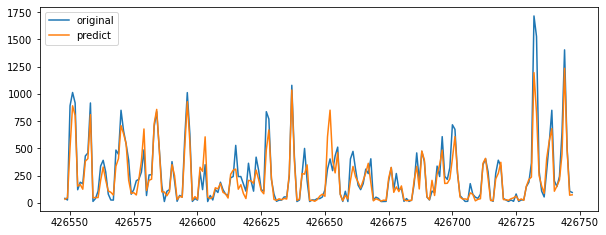

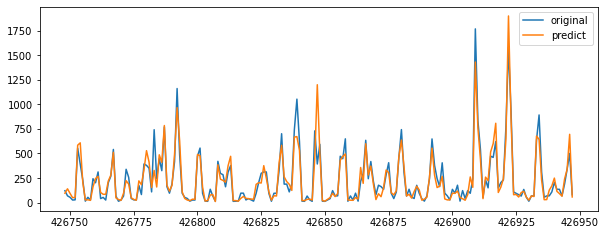

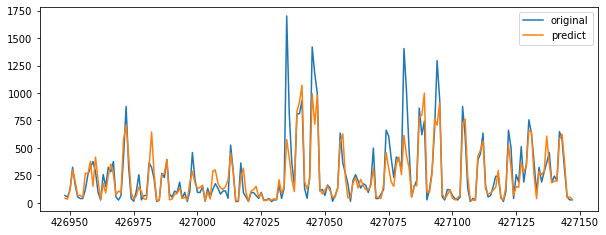

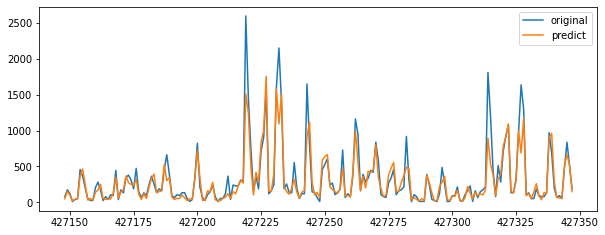

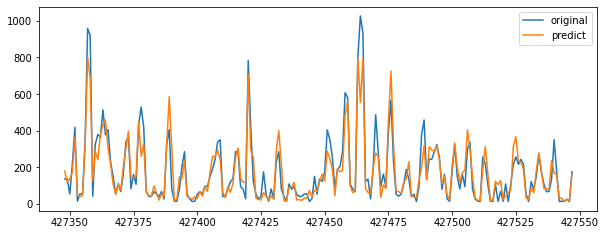

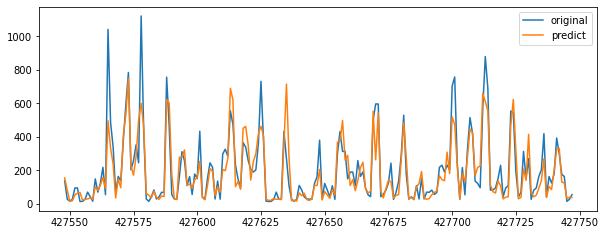

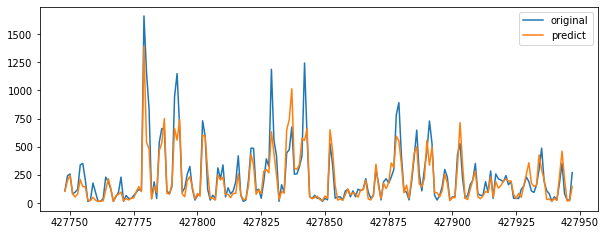

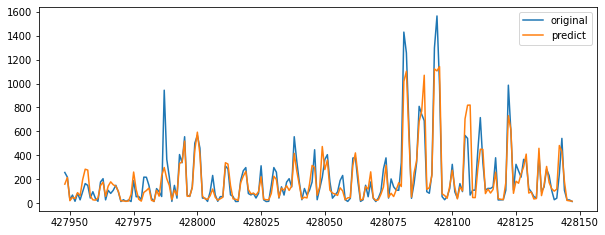

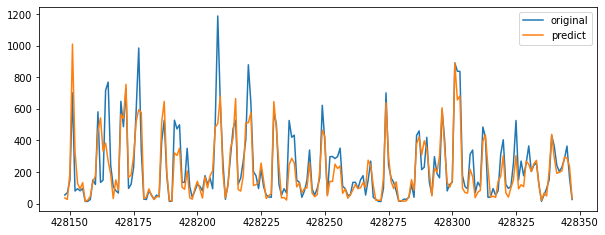

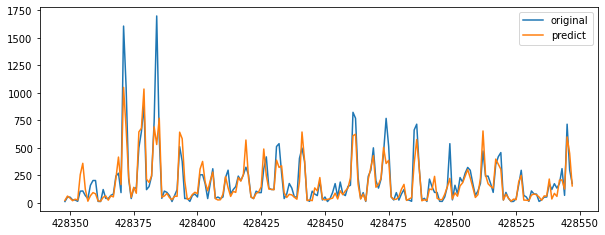

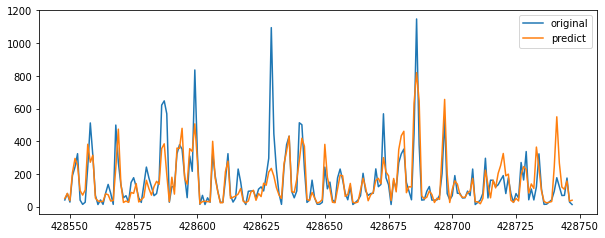

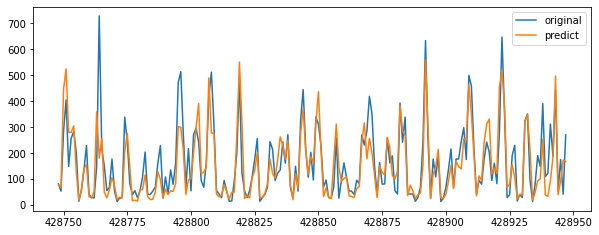

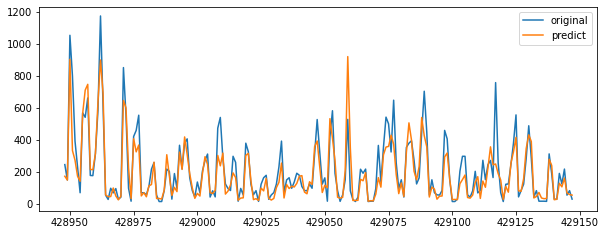

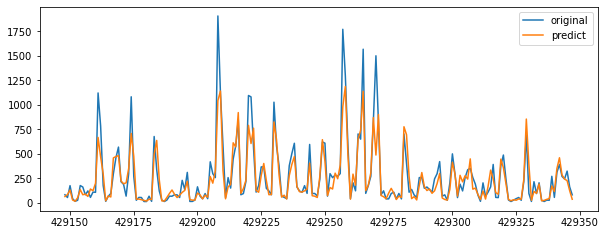

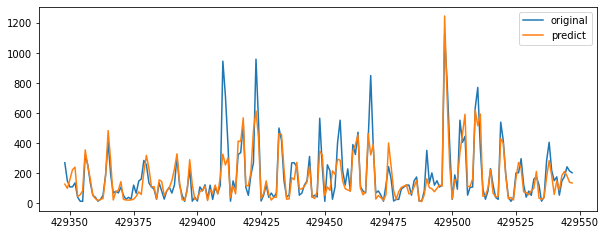

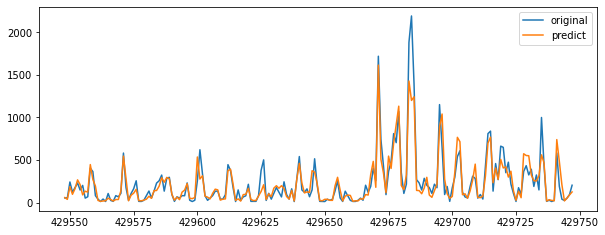

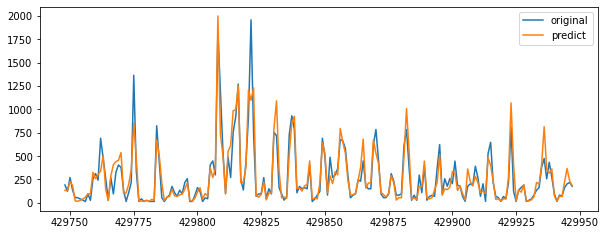

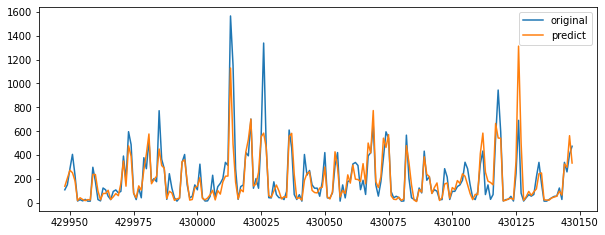

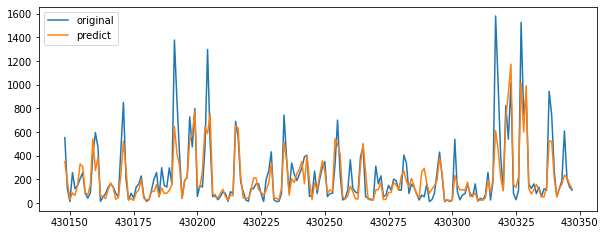

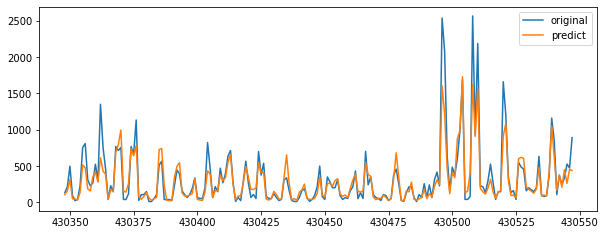

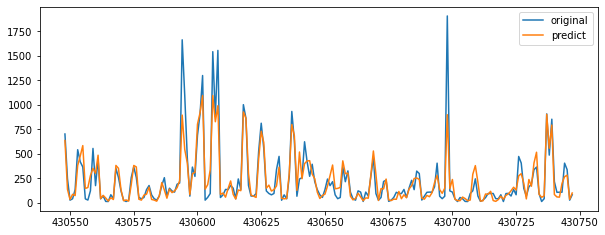

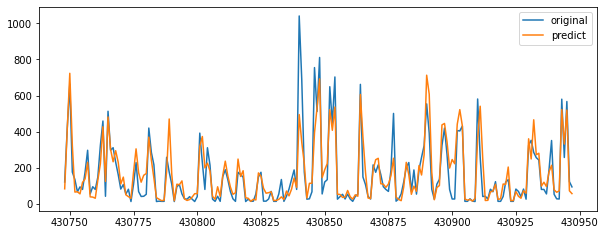

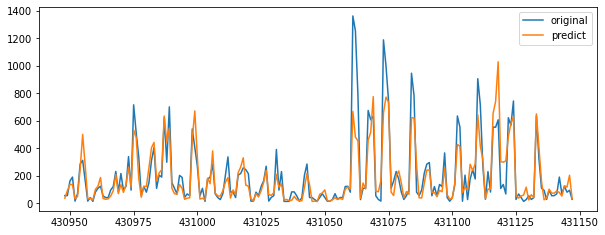

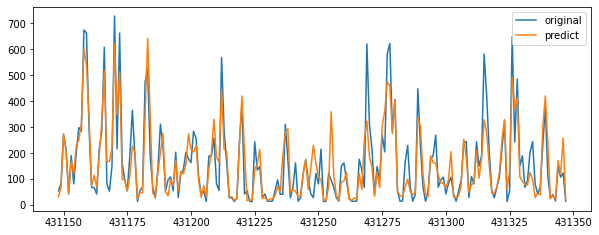

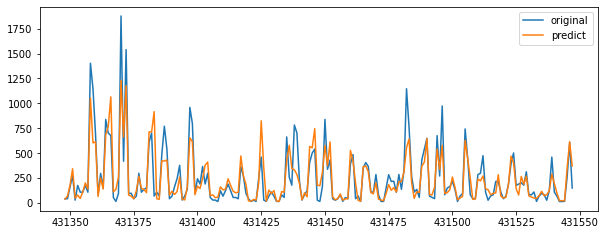

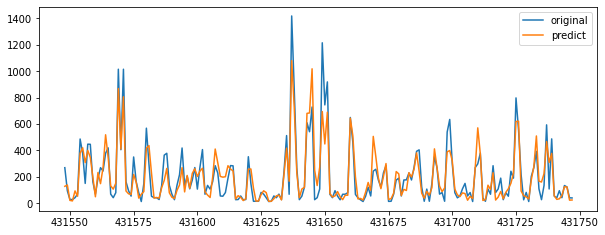

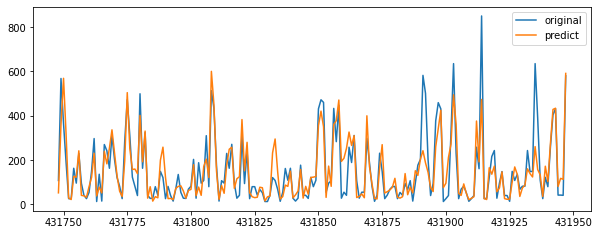

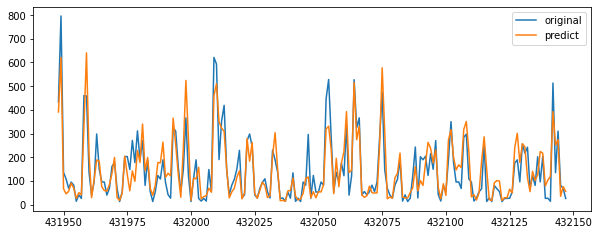

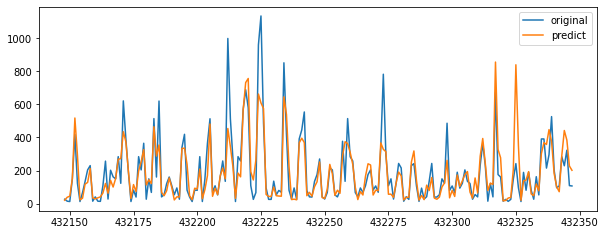

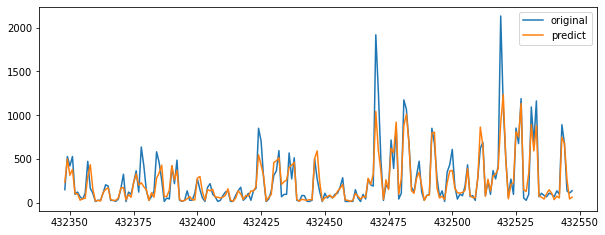

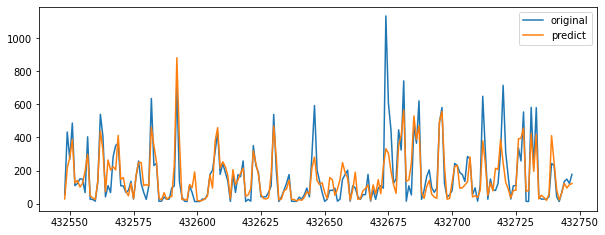

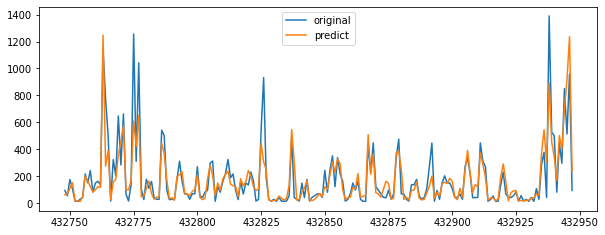

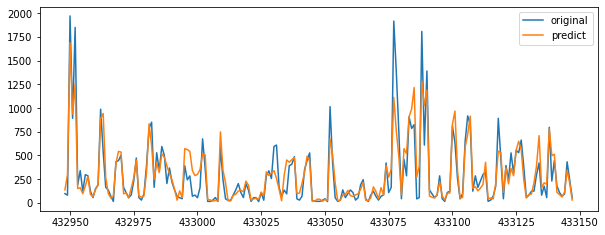

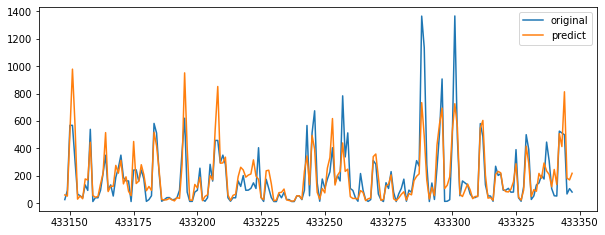

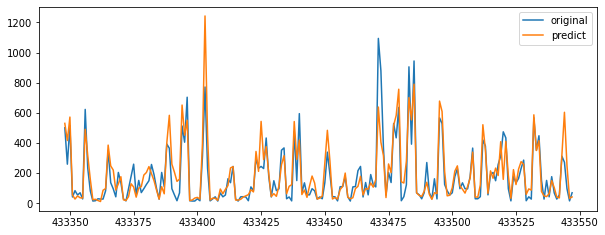

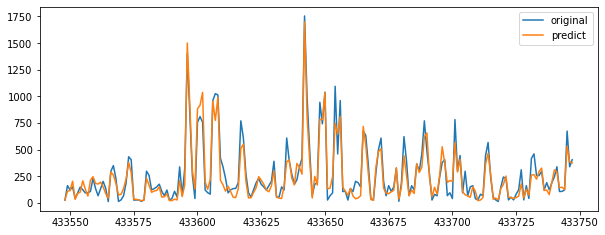

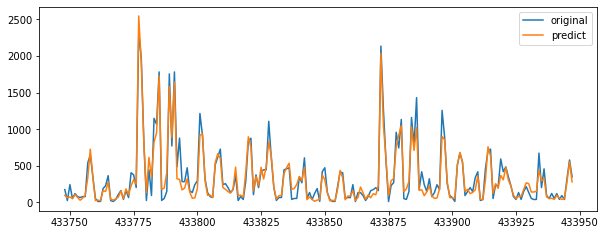

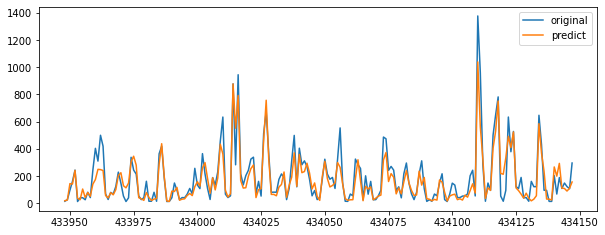

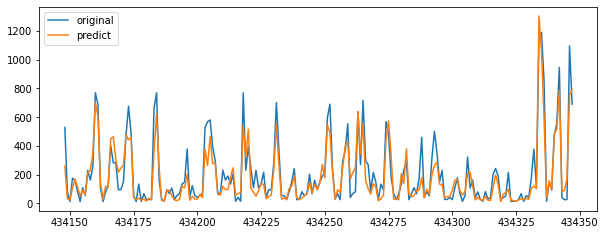

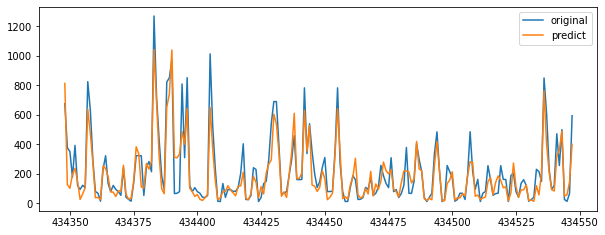

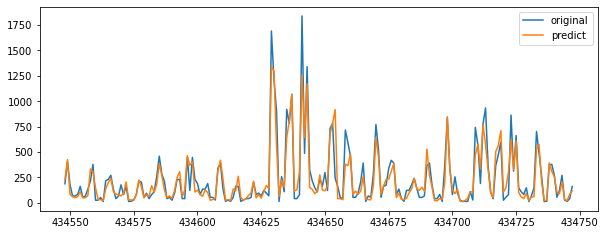

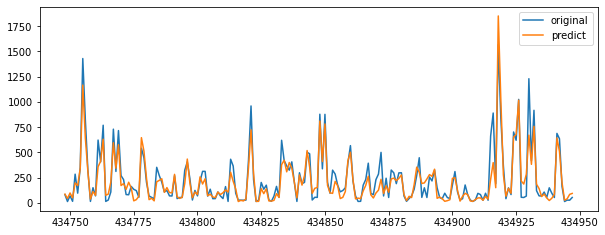

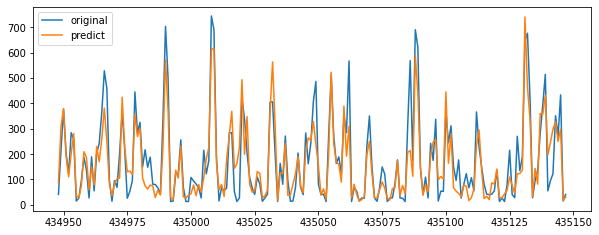

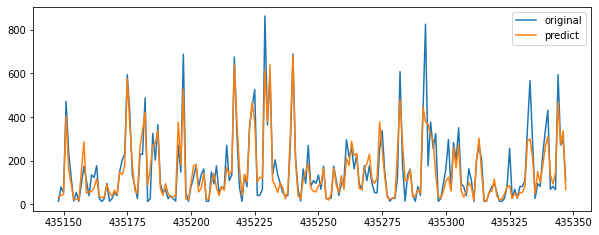

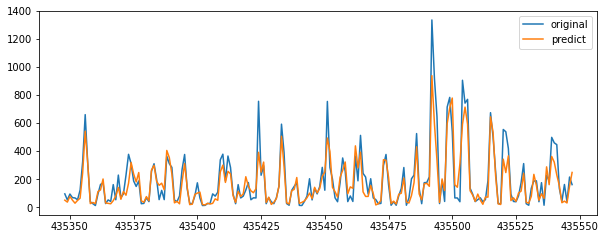

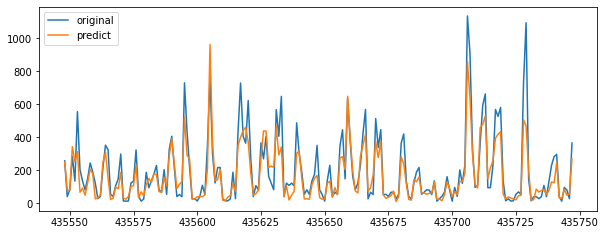

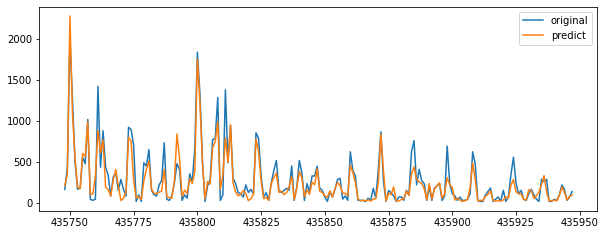

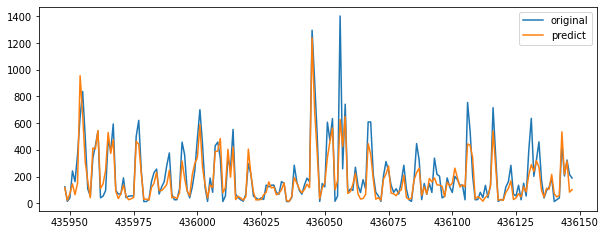

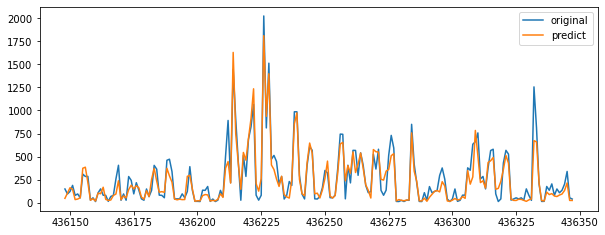

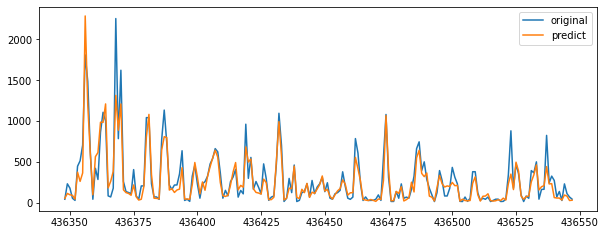

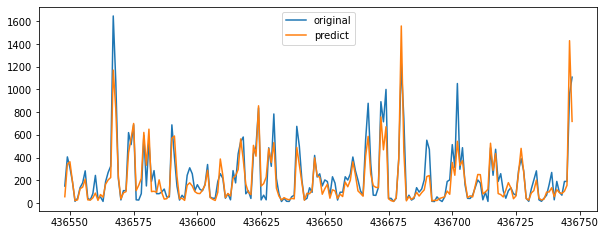

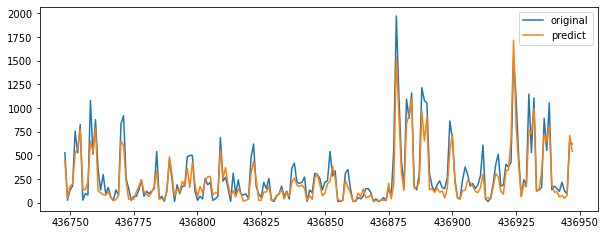

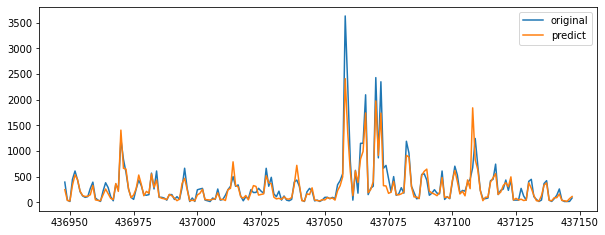

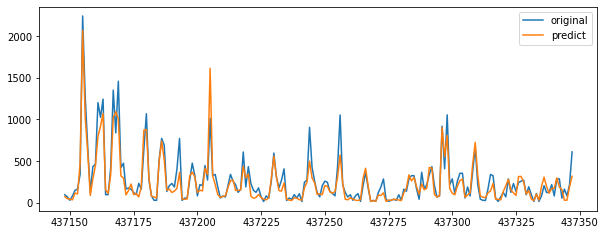

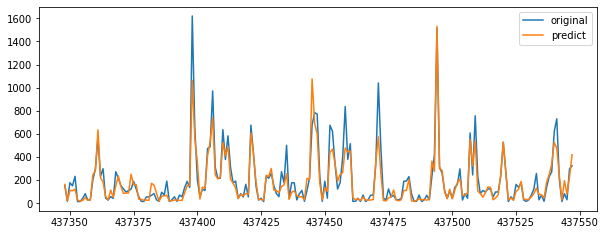

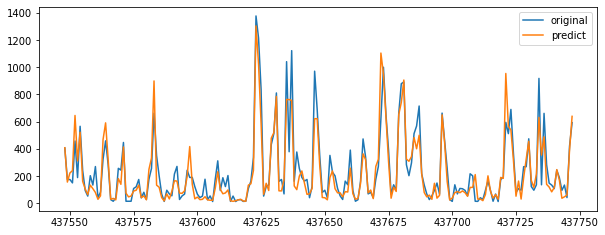

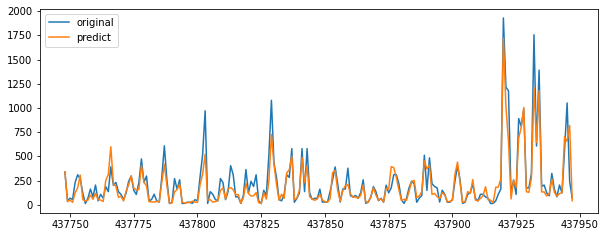

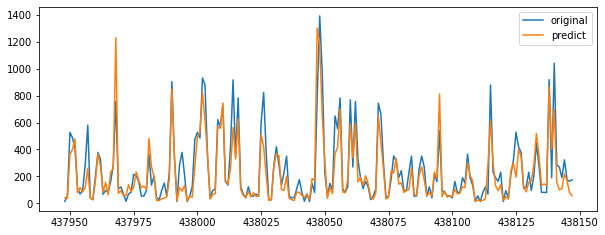

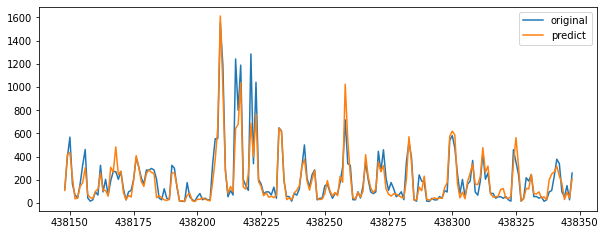

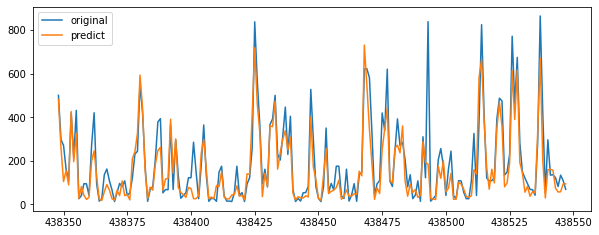

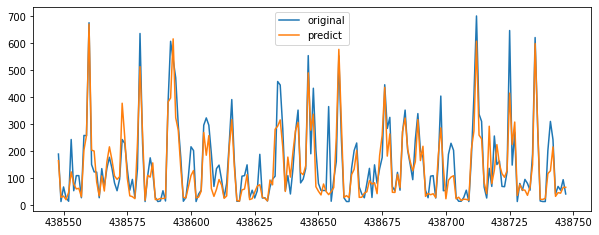

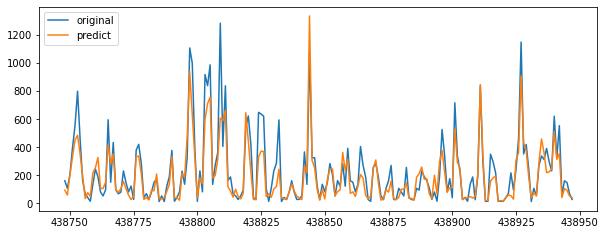

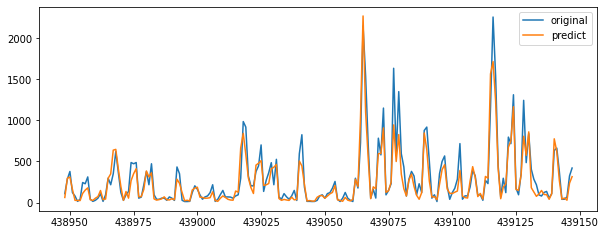

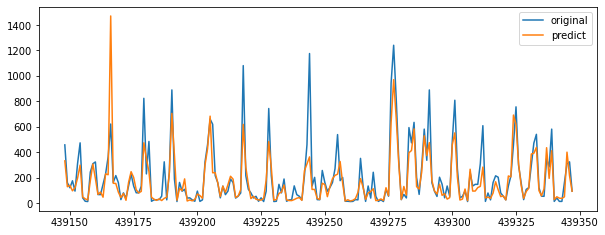

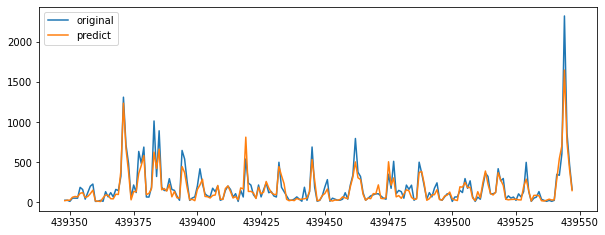

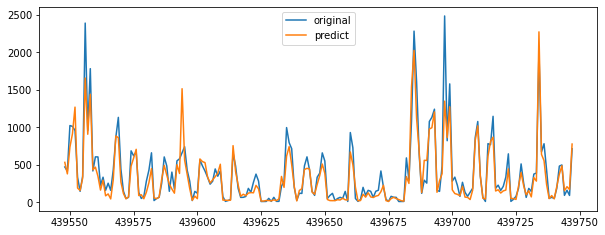

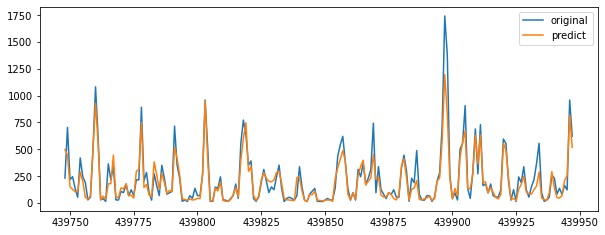

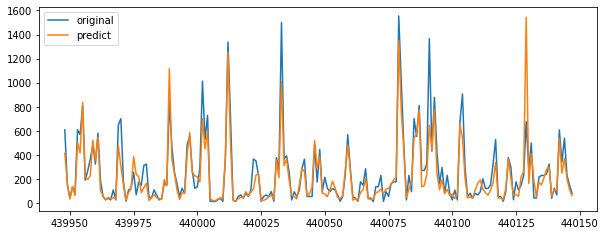

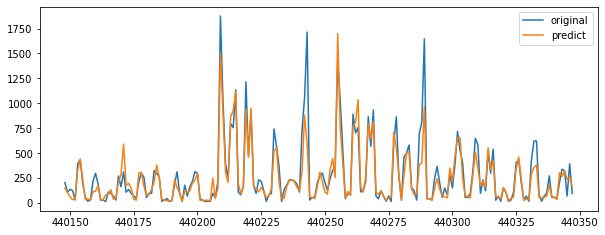

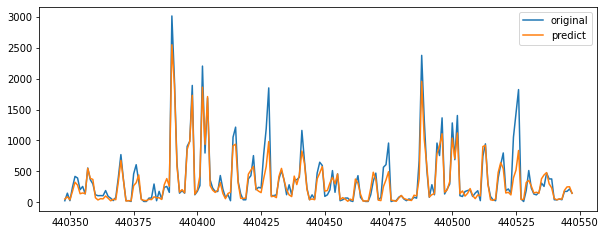

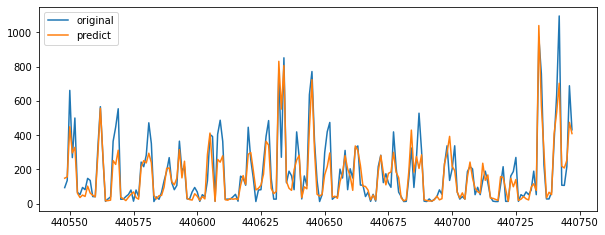

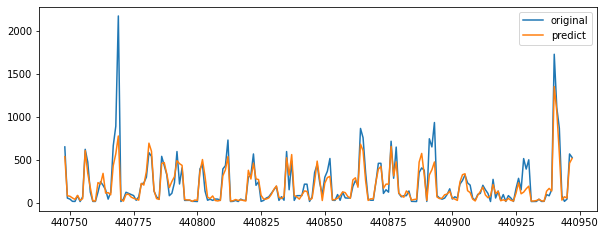

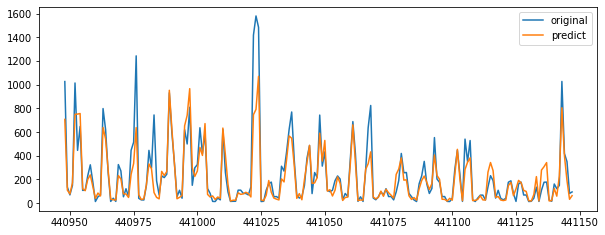

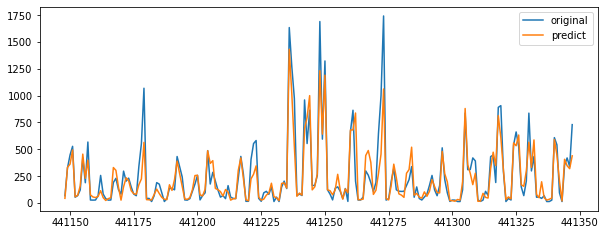

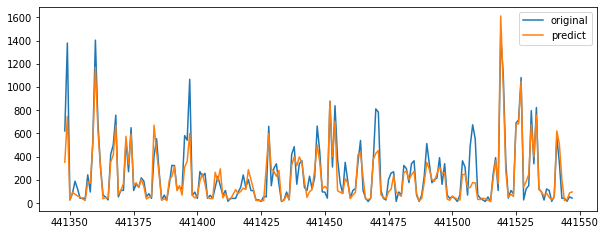

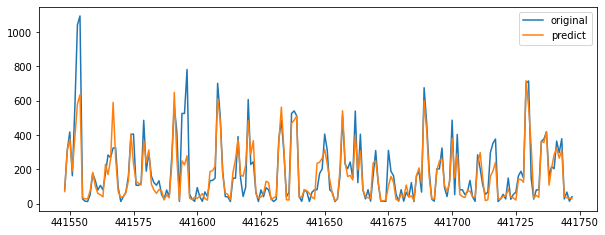

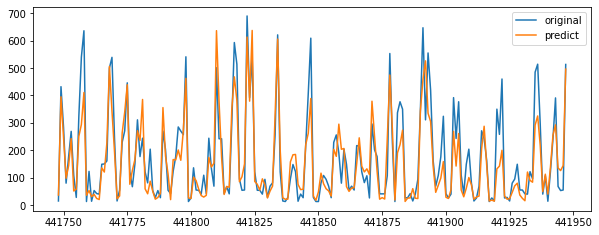

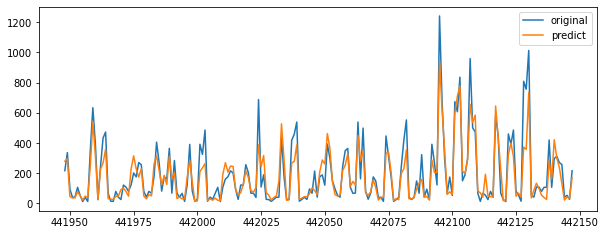

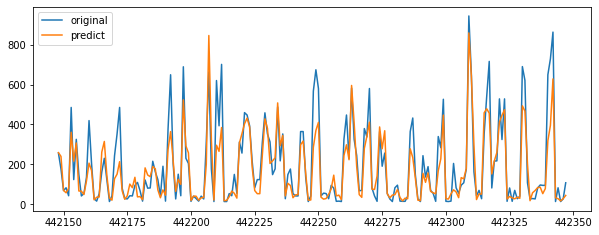

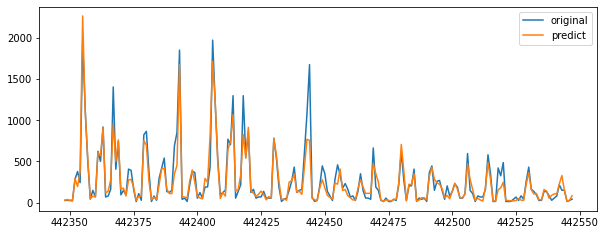

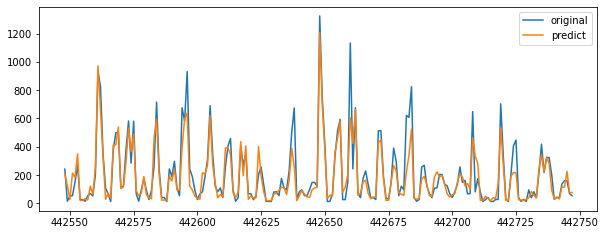

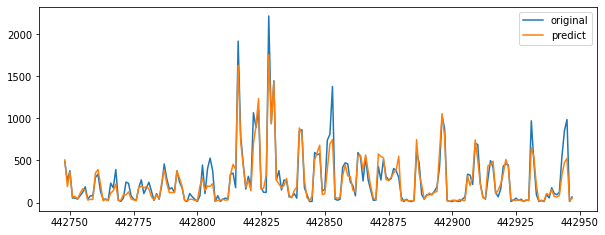

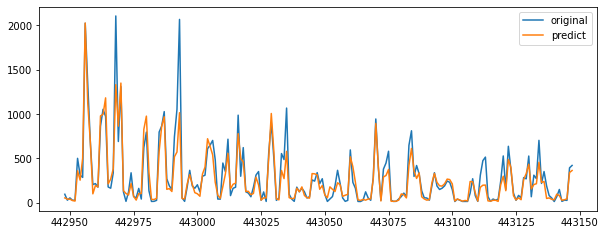

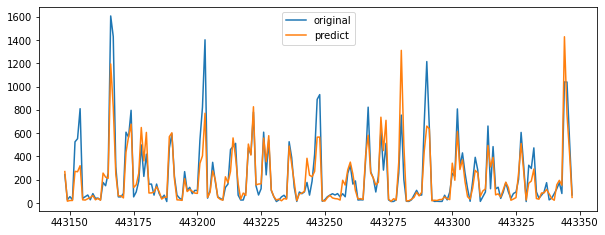

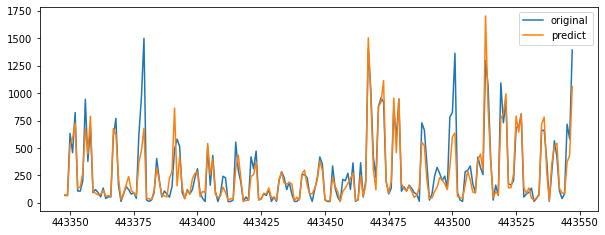

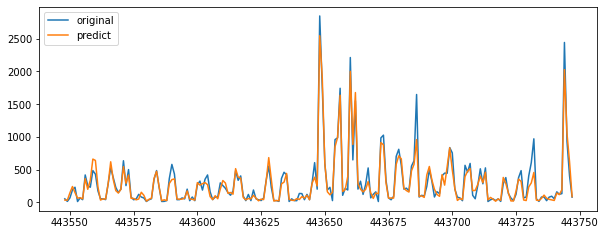

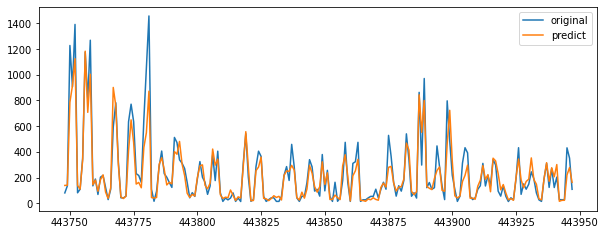

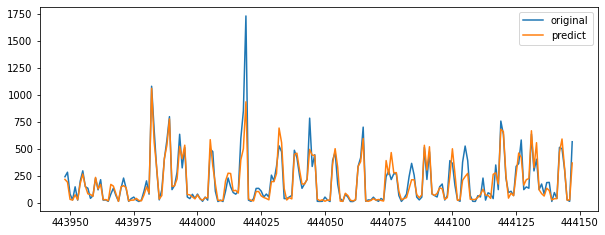

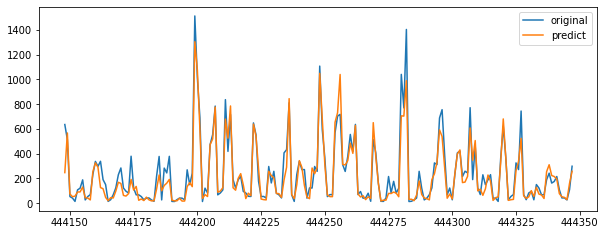

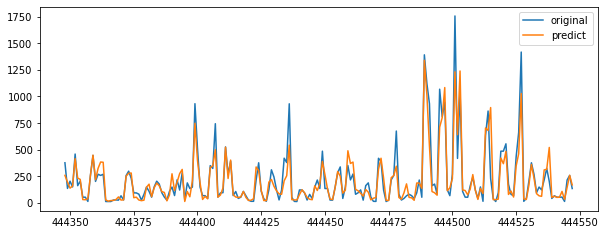

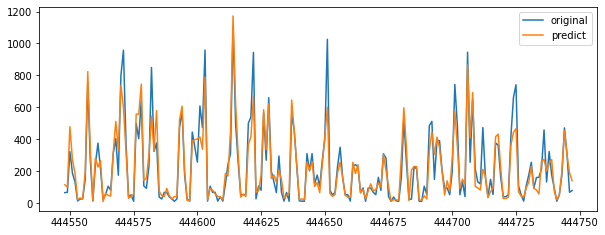

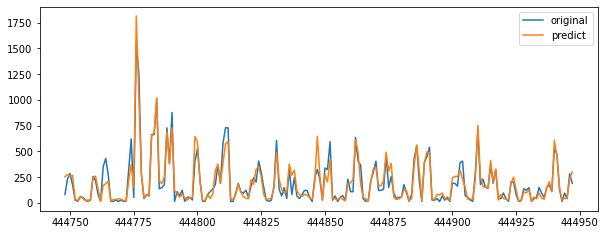

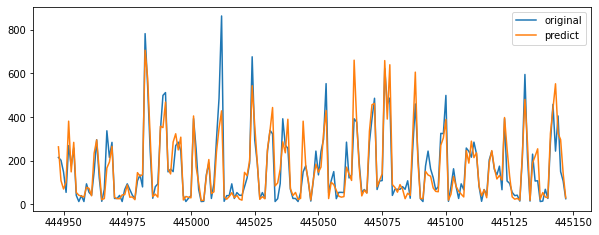

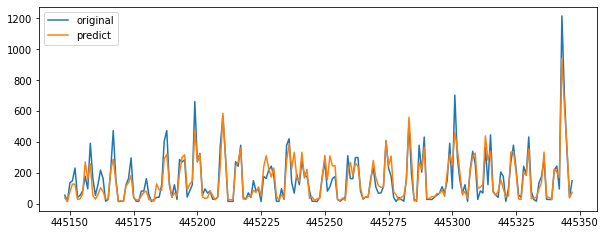

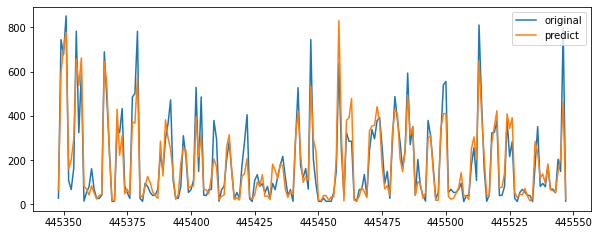

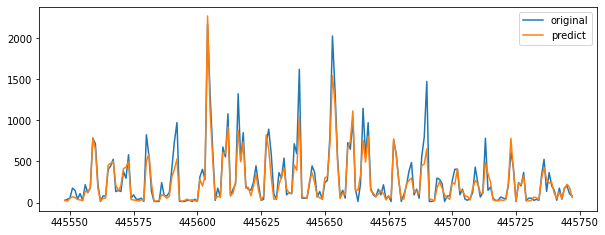

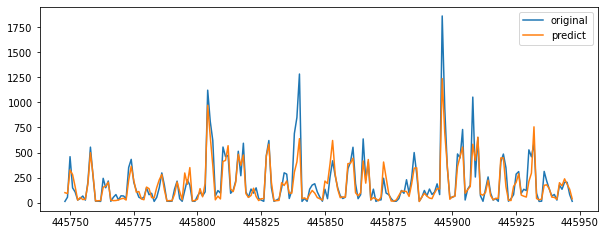

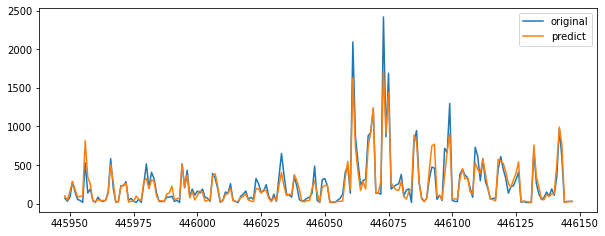

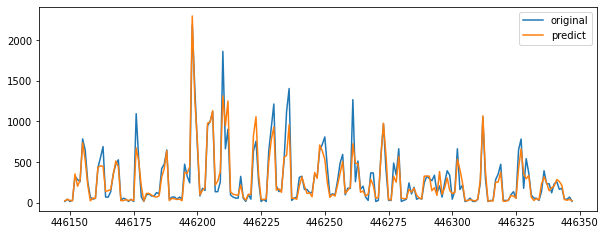

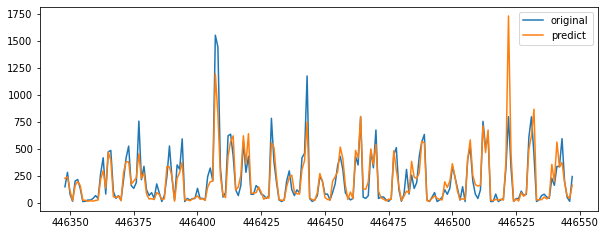

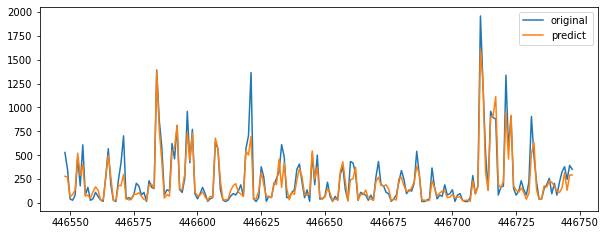

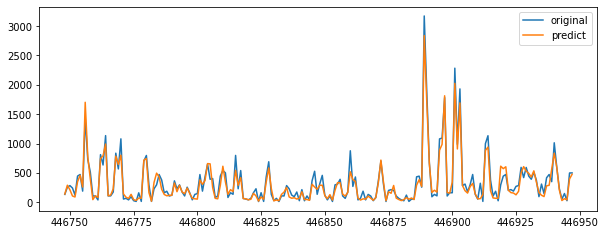

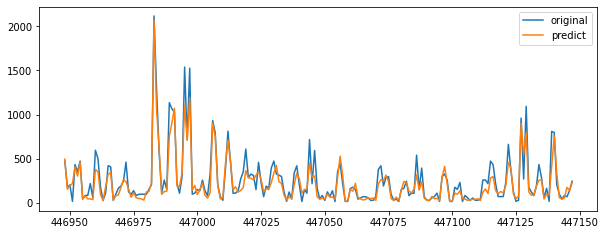

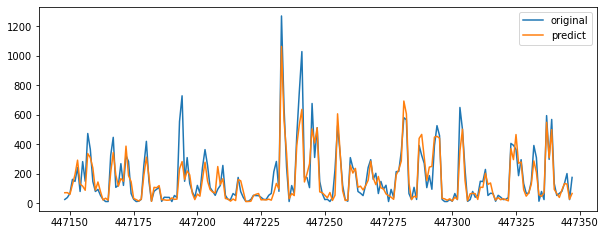

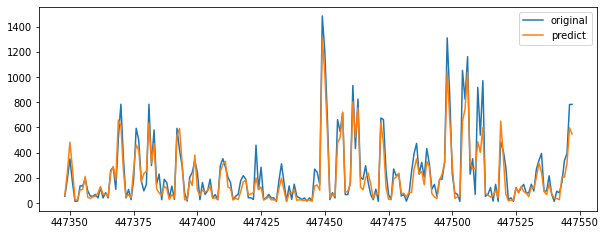

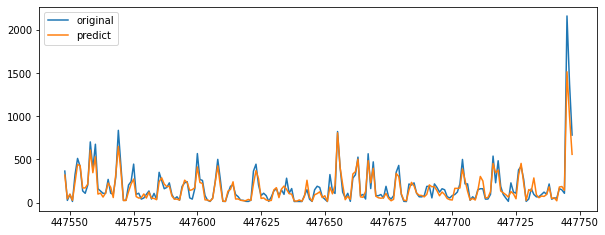

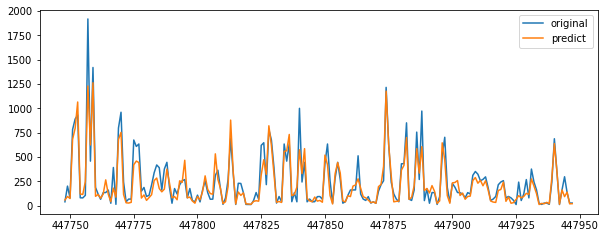

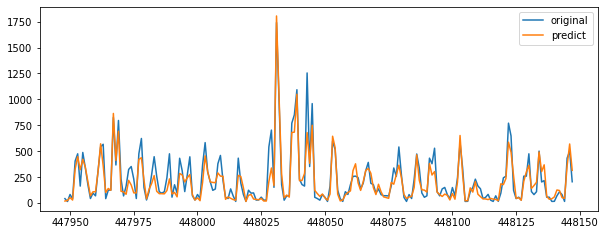

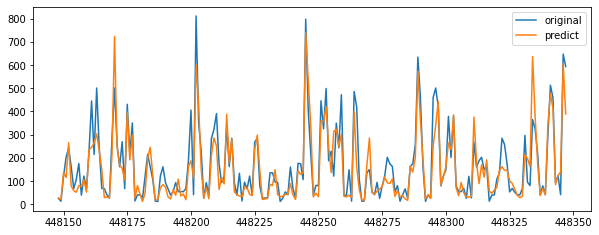

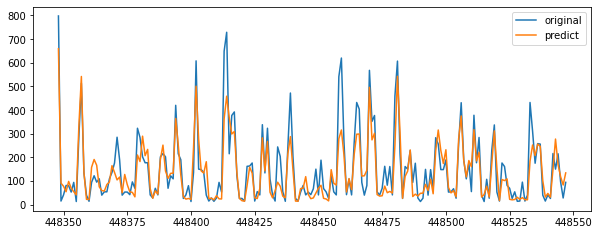

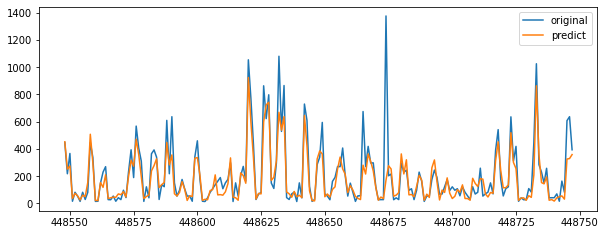

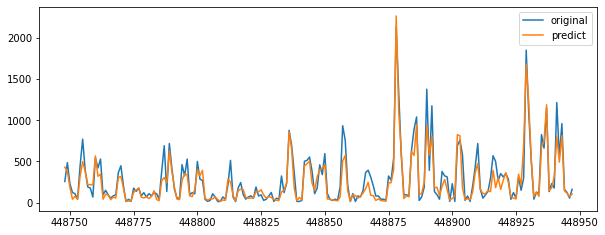

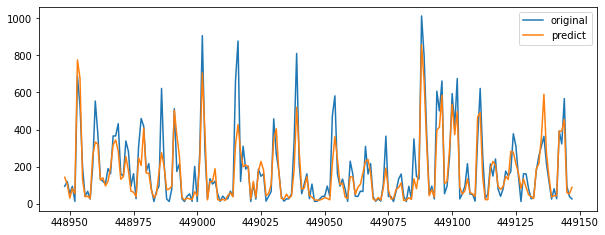

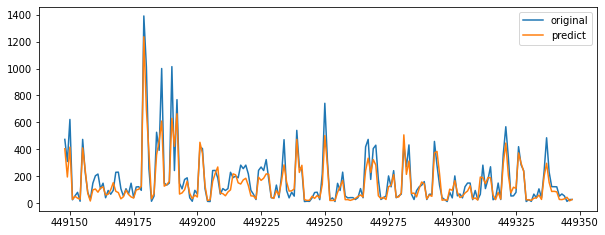

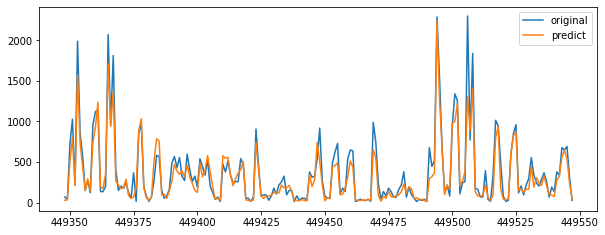

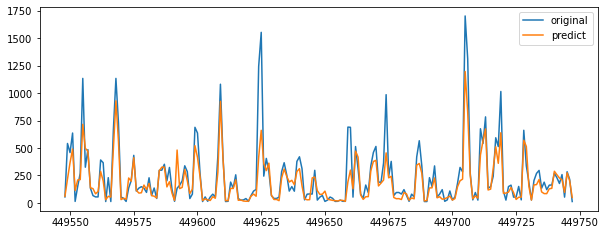

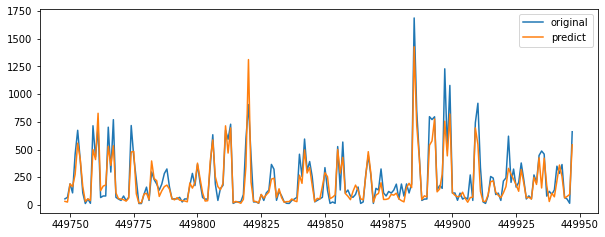

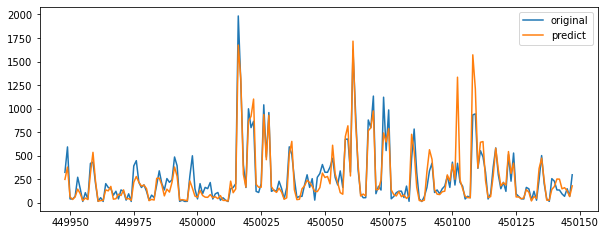

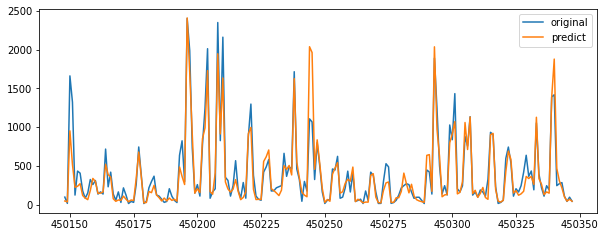

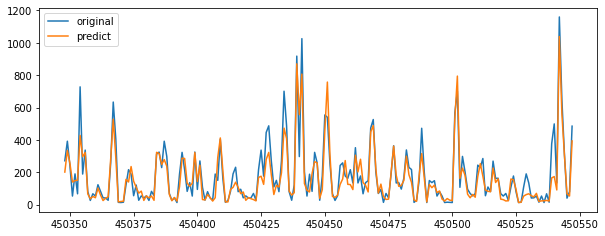

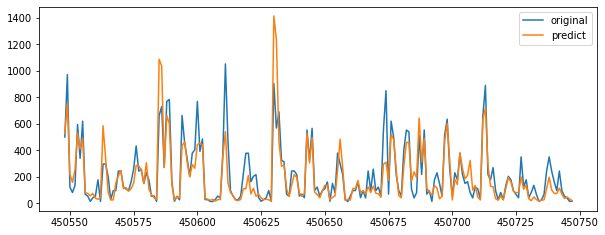

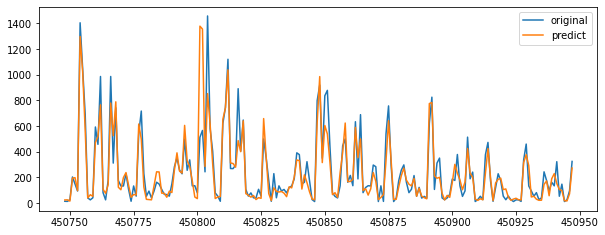

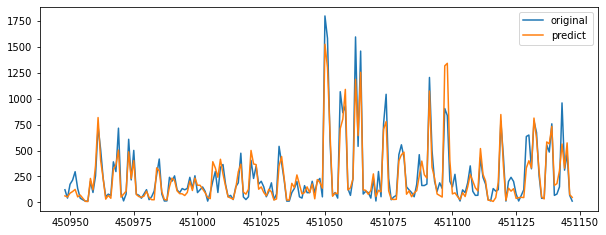

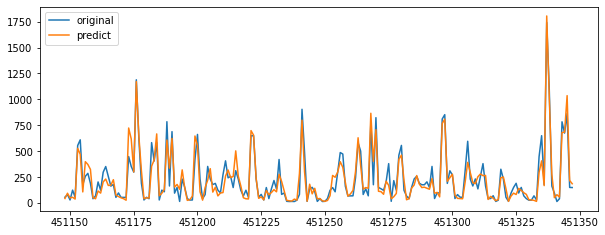

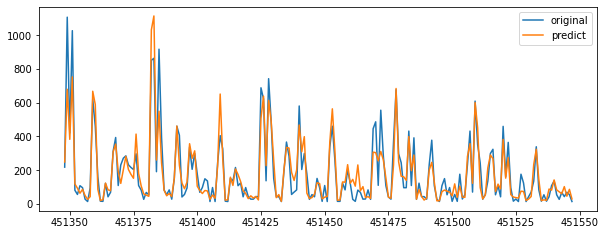

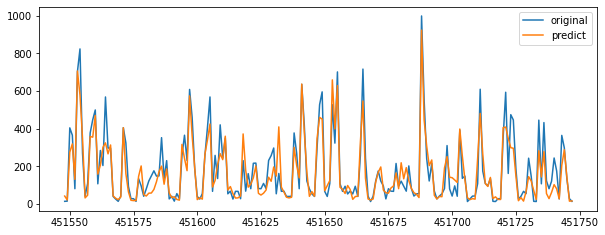

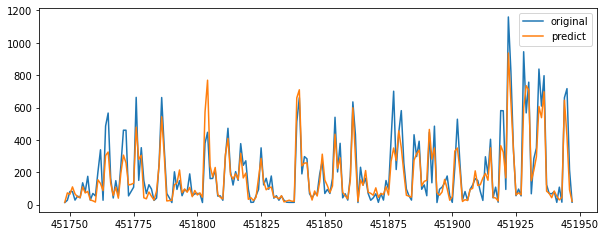

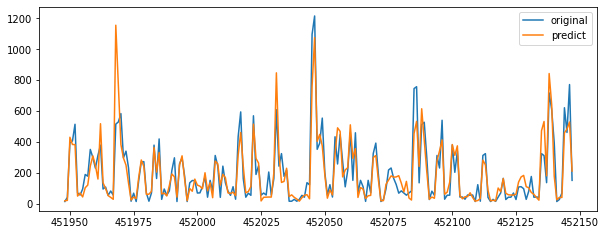

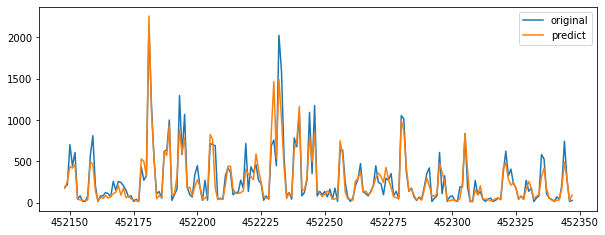

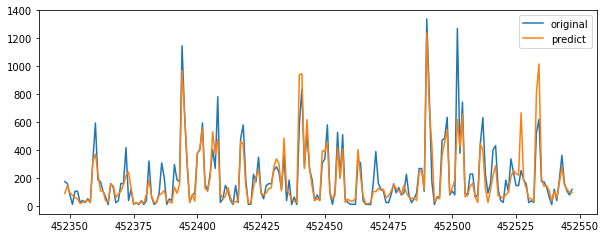

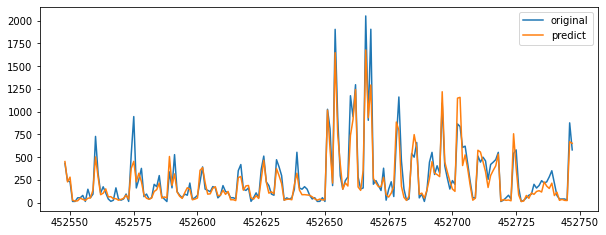

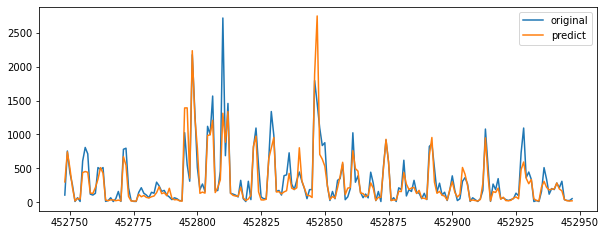

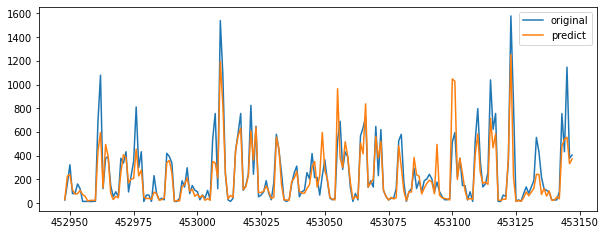

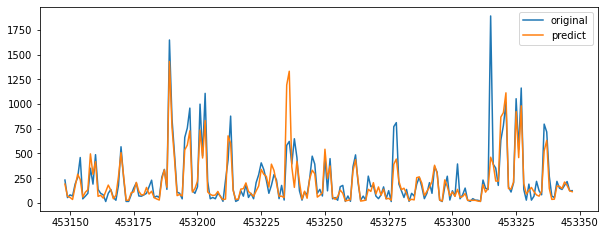

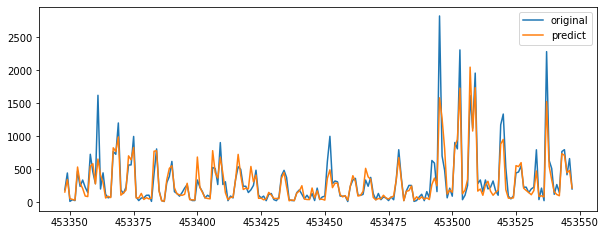

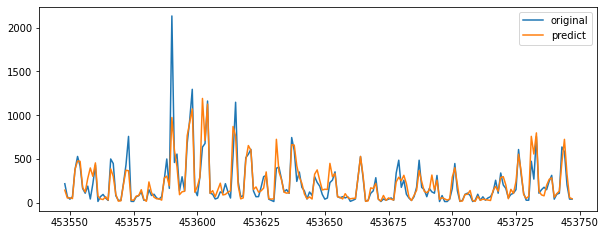

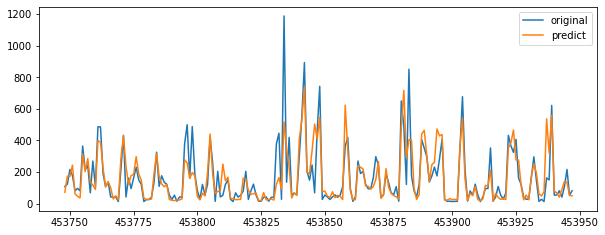

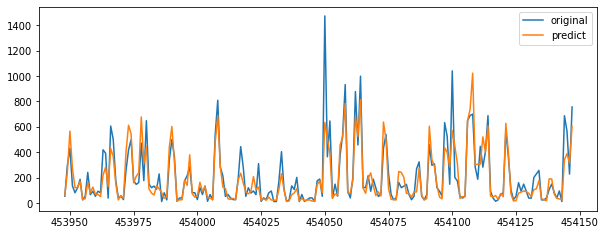

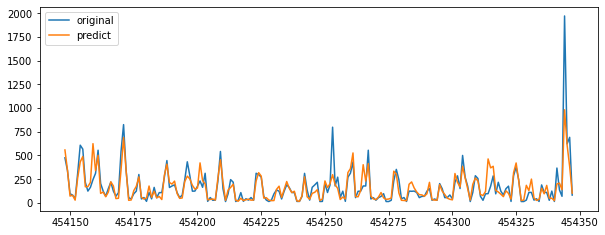

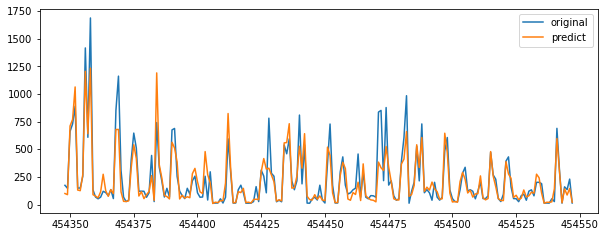

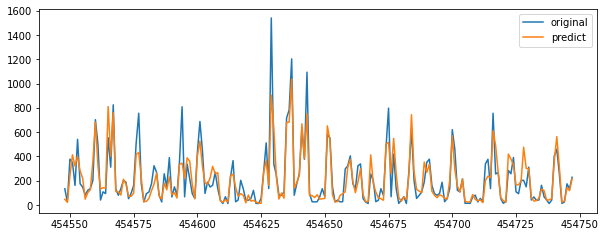

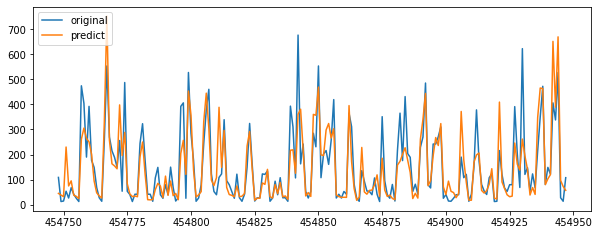

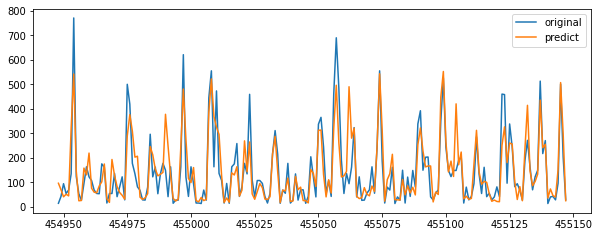

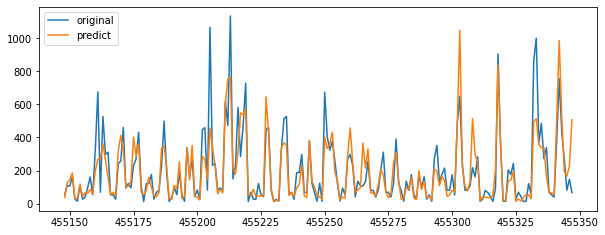

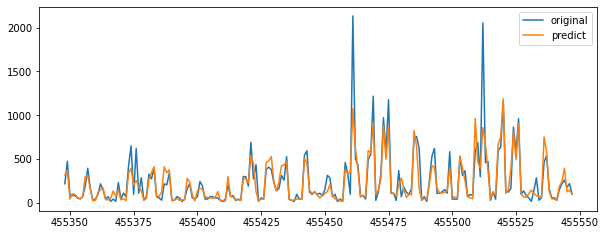

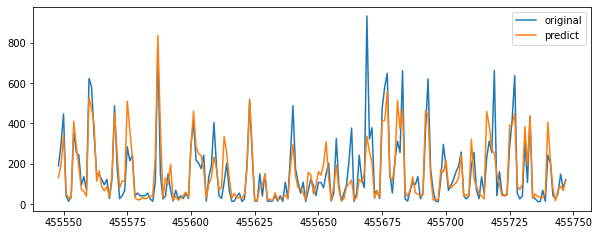

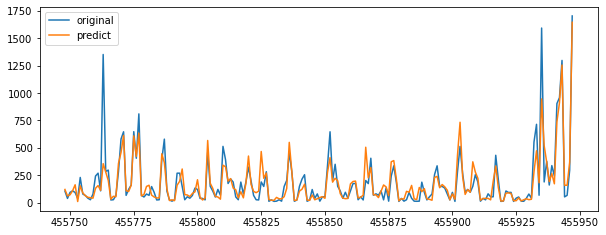

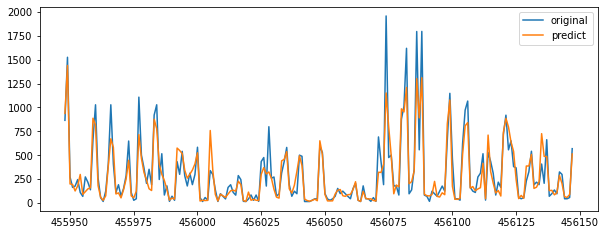

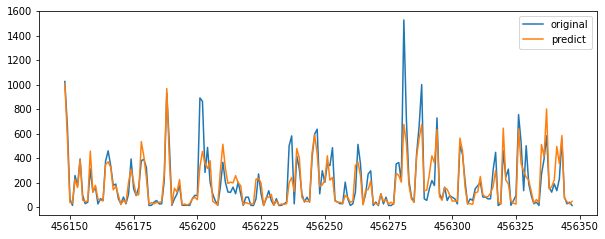

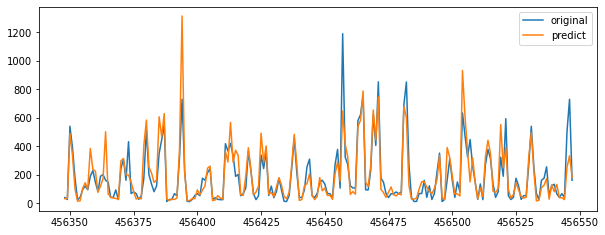

In [36]:
for i in range (int(len(pred)/200)):
    pred[(i*200):((i+1)*200)].plot(figsize=(10,3.755))